Imports & Function definitions

In [65]:
from ROOT import TF2, TH1D, TF1, TFile, TCanvas, gROOT
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import ROOT
import pandas as pd
from matplotlib.ticker import NullFormatter, MaxNLocator
from numpy import linspace
from ipynb.fs.full.niceplots import hist2d_withprojections;
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D 
import itertools


def April_Ntuple_to_df_List(month,ntuple,channels):
    mylist=[]
    aux=[]
    for run in ntuple:
        df1 = ROOT.RDataFrame("ntuple","AnalysisROOT%s/Run%i_NTuple.root" %(month,run))
        Qdf1 = ROOT.RDataFrame("charge","AnalysisROOT%s/Run%i_NTuple.root" %(month,run))
        diccionario=df1.AsNumpy()
        Qdiccionario=Qdf1.AsNumpy()
        aspd=pd.DataFrame(diccionario)
        Qaspd=pd.DataFrame(Qdiccionario)
        april_all_pd=pd.DataFrame.join(aspd,Qaspd)
        for ch in range(channels):
            aux.append(april_all_pd[april_all_pd["ch"]==ch])
        
        mylist.append(aux)
        
    return mylist;

def plot_var_wall(df1,colors,ch,var,wall_var,wall,axes=None,nbins=250,xlabel="",ylabel="Counts"):
    fig=plt.figure(figsize=(9,6), dpi= 100, facecolor='w', edgecolor='k')
    plt.hist(df1[(df1["ch"]==ch) ][var],nbins,axes,histtype ='bar', ec='black',color=colors[0]);
    plt.hist(df1[(df1["ch"]==ch) & (df1[wall_var]<wall)][var],nbins,axes,histtype ='bar', ec='black',color=colors[1]);
    plt.hist(df1[(df1["ch"]==ch) & (df1[wall_var]>wall)][var],nbins,axes,histtype ='bar', ec='black',color=colors[2]);
    plt.minorticks_on()
    plt.xlabel(xlabel, fontsize=16)  
    plt.ylabel(ylabel, fontsize=16)            

def multi_plot_same_run(df1,colors,ch,var,axes=None,nbins=100,leyenda=[],log=False):
    fig=plt.figure(figsize=(9,6), dpi= 100, facecolor='w', edgecolor='k')
    for i in range(len(var)):
        plt.hist(df1[(df1["ch"]==ch) ][var[i]],nbins,axes,histtype ='step',color=colors[i]);
    plt.xlabel("Charge (pC)", fontsize=16)  
    plt.ylabel("Counts", fontsize=16)            
    plt.minorticks_on()
    plt.legend(leyenda)
    if log==True:
        plt.yscale('log')
        

Load ROOT Files

In [37]:
#Open the ROOT TNtuples

apr_ntupla=[12,26,38,50,62];
may_ntupla=[15,27,39];
apr_cosmics_ntupla=[13,27,39,51];
apr_low_trigger=[5];

april_list=April_Ntuple_to_df_List("_April",apr_ntupla,3)
april_cosmics_list=April_Ntuple_to_df_List("_April",apr_cosmics_ntupla,3)
april_low_trigger=April_Ntuple_to_df_List("_April",apr_low_trigger,3)
may_list=April_Ntuple_to_df_List("",may_ntupla,3)#may

Mayo separando por TDiff

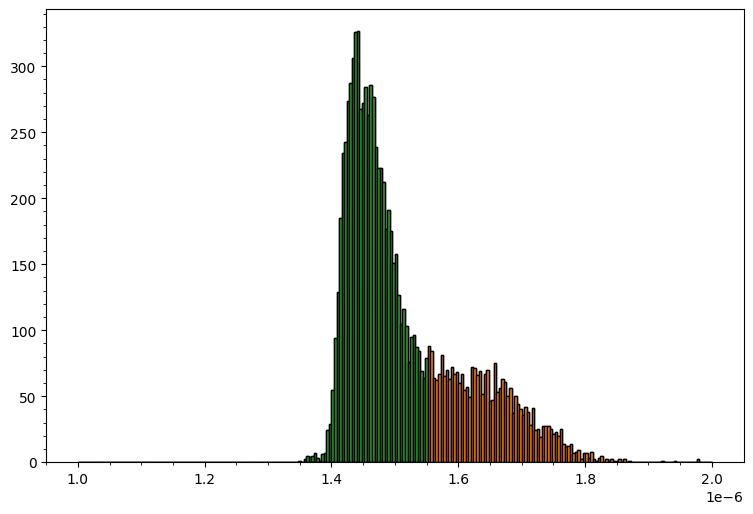

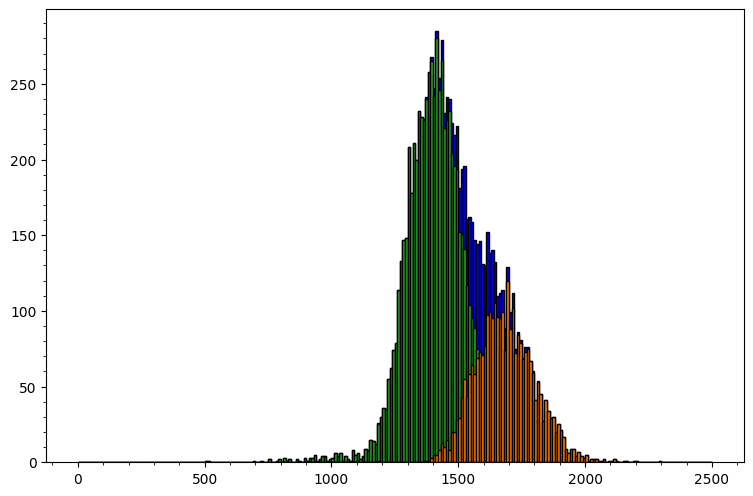

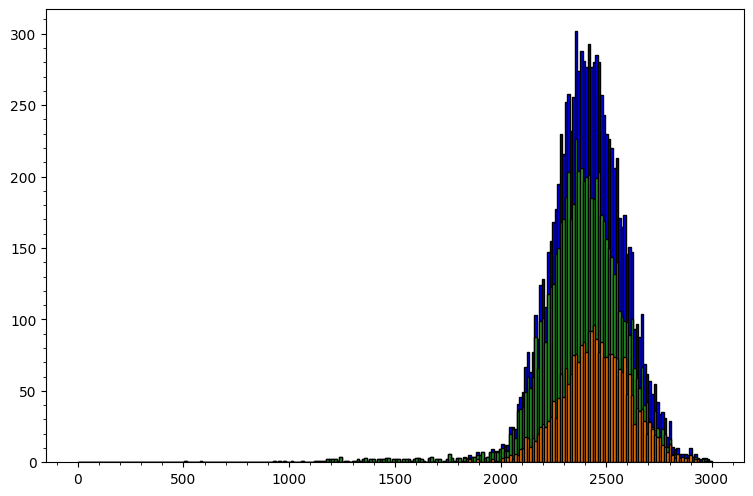

In [3]:
#Mayo
plot_var_wall(may_list[0][0],["blue","tab:green","tab:orange"],0,"TEndQPeak","TEndQPeak",1.55e-6,[1e-6,2e-6])
plot_var_wall(may_list[0][0],["blue","tab:green","tab:orange"],0,"QPeak","TDiff",2.5e-7,[0,2500])
plot_var_wall(may_list[0][0],["blue","tab:green","tab:orange"],0,"QFixRange4","TDiff",2.5e-7,[0,3000])


Charge comparation plots

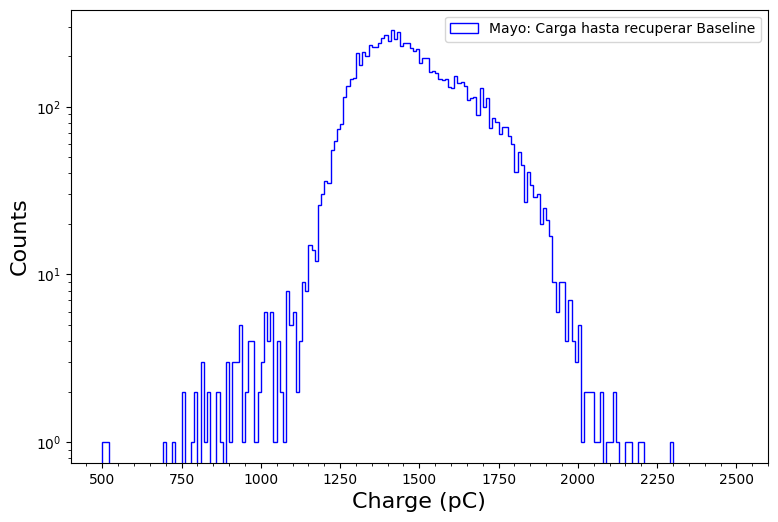

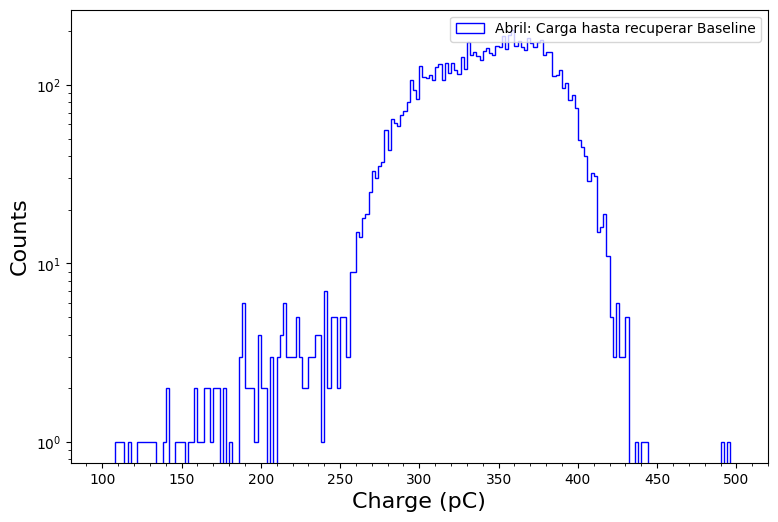

In [4]:
ch=0;
colors=["blue","green","red","yellow"]
var=["QPeak","QFixRange2", "QFixRange3", "QFixRange4"]
# legend=["Carga hasta recuperar Baseline","Carga","","",""]
nbins=200
multi_plot_same_run(may_list[0][0],colors,ch,["QPeak"],[500,2500],nbins,["Mayo: Carga hasta recuperar Baseline"],log=True)
multi_plot_same_run(april_list[0][0],colors,ch,["QPeak"],[100,500],nbins,["Abril: Carga hasta recuperar Baseline"],log=True)



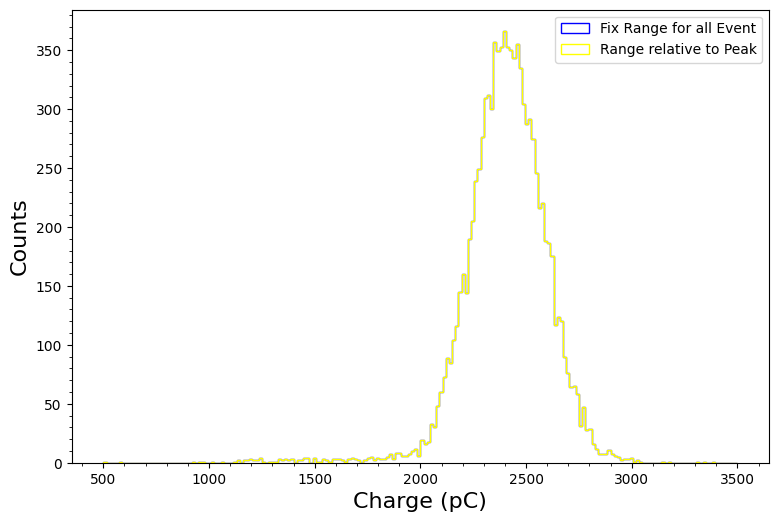

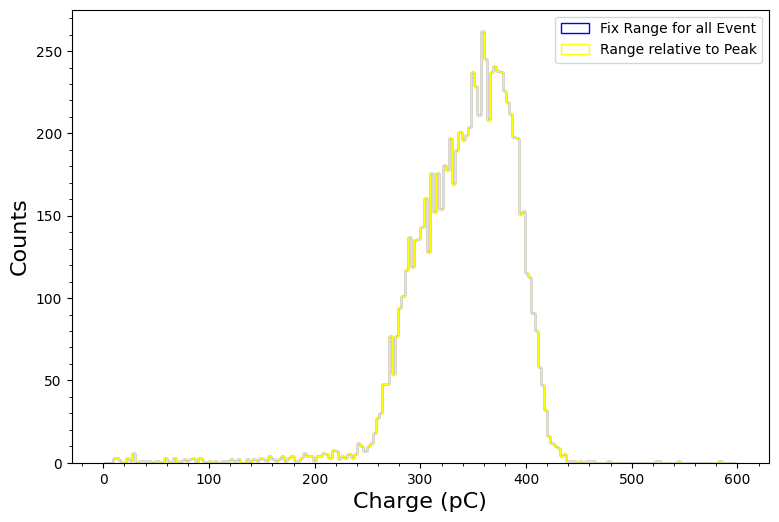

In [5]:
ch=0;#PMT
colors=["blue","yellow","green","purple"]
var=["QFixRange1","QFixRange2", "QFixRange3", "QFixRange4"]
nbins=200

# legend=["1.4 $𝜇s$ (1300+100 ns)","3.3 $𝜇s$","4.3 $𝜇s$","5.3 $𝜇s$"]
# multi_plot_same_run(april_list[0],colors,ch,var,[0,500],nbins,legend)

# legend=["1.4 $𝜇s$ (1300+100 ns)","6.3 $𝜇s$","7.3 $𝜇s$","8.3 $𝜇s$"]
# multi_plot_same_run(may_list[0],colors,ch,var,[500,3500],nbins,legend)

var=["QFixRange4","QPeakRange4"]
legend=["Fix Range for all Event", "Range relative to Peak"]
multi_plot_same_run(may_list[0][0],colors,ch,var,[500,3500],nbins,legend)
multi_plot_same_run(april_list[0][0],colors,ch,var,[0,600],nbins,legend)

Abril buscar variable para separar chepas

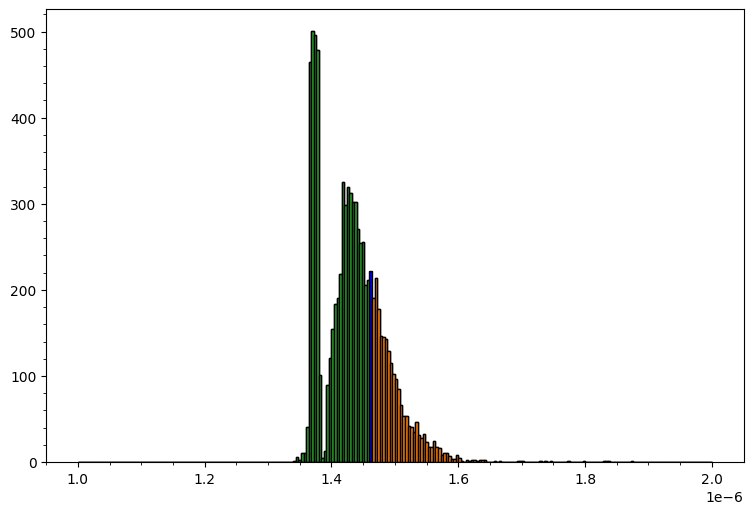

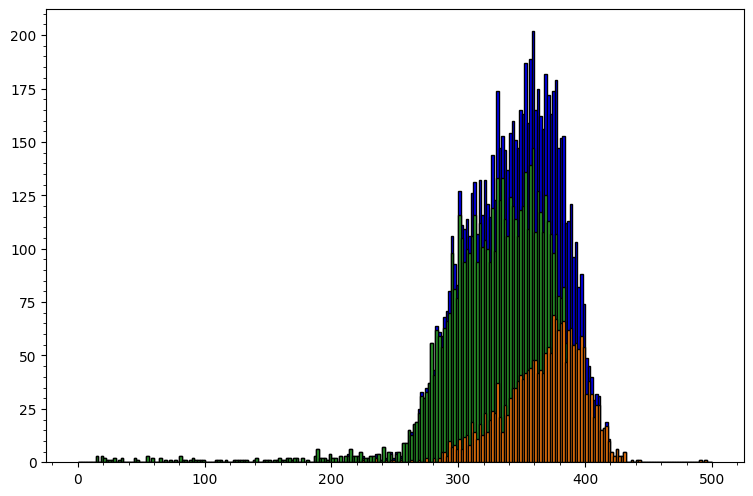

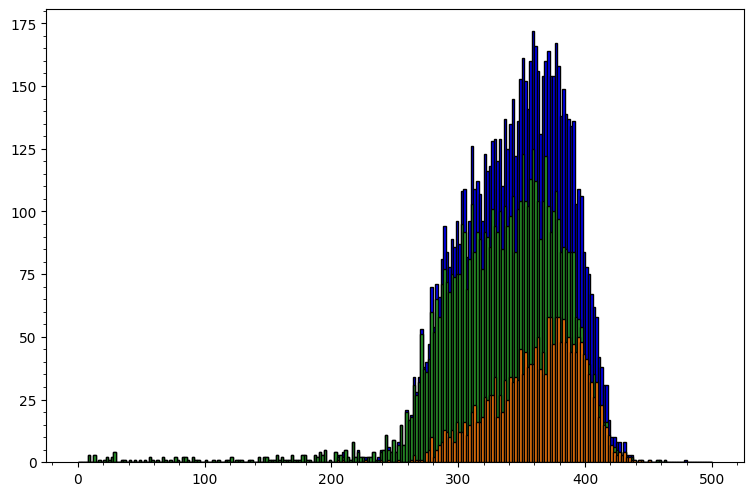

In [15]:
#Abril
wall=1.46e-6
day=3
plot_var_wall(april_list[day][0],["blue","tab:green","tab:orange"],0,"TEndQPeak","TEndQPeak",wall,[1e-6,2e-6])
plot_var_wall(april_list[day][0],["blue","tab:green","tab:orange"],0,"QPeak","TEndQPeak",wall,[0,500])
plot_var_wall(april_list[day][0],["blue","tab:green","tab:orange"],0,"QFixRange4","TEndQPeak",wall,[0,500])


In [27]:
plot_var_wall(april_list[0][0],["blue","tab:green","tab:orange"],0,"TDiff","TDiff",0.9e-7,[0,0.9e-6])

F100 Plots

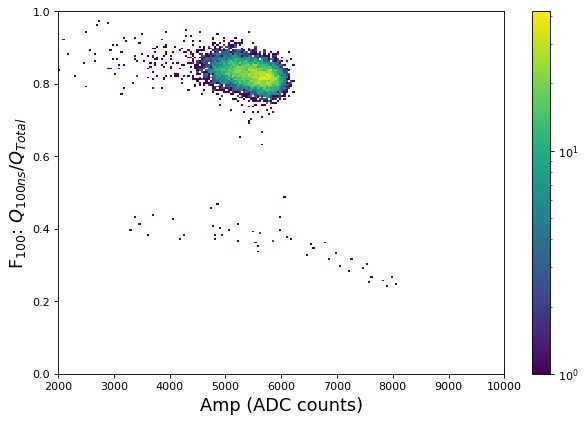

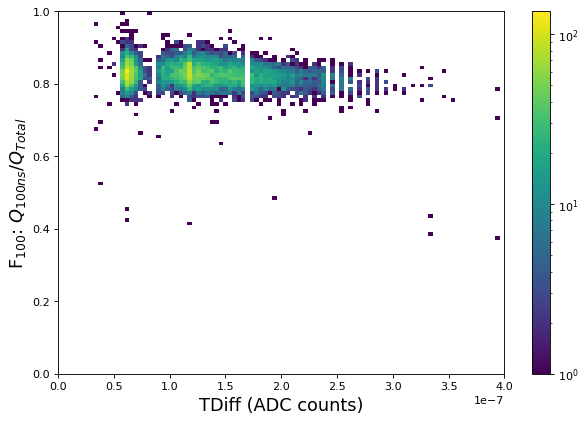

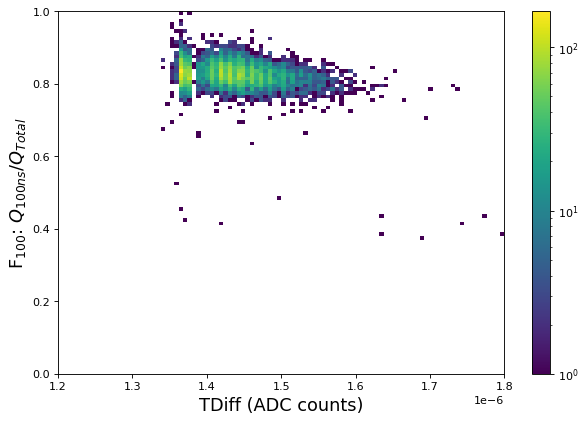

In [8]:
# df1=may_list[0][0]
df1=april_list[0][0]

f100=df1["QPeakRange1"]/df1["QPeakRange4"];

fig=plt.figure(figsize=(9,6), dpi= 80, facecolor='w', edgecolor='k')
# h=plt.hist2d(df1["QPeakRange4"],f100,200,[[8e3,15e3],[0,1]],norm=LogNorm());
# plt.xlabel("Carga Total (pC)", fontsize=16)
# plt.ylabel("F$_{100}$: $Q_{100ns}/Q_{Total}$", fontsize=16)  

h=plt.hist2d(df1["Amp"],f100,200,[[2e3,10e3],[0,1]],norm=LogNorm());
plt.xlabel("Amp (ADC counts)", fontsize=16)
plt.ylabel("F$_{100}$: $Q_{100ns}/Q_{Total}$", fontsize=16)  

plt.colorbar(h[3])
plt.show()


fig=plt.figure(figsize=(9,6), dpi= 80, facecolor='w', edgecolor='k')

h=plt.hist2d(df1["TDiff"],f100,100,[[0,0.4e-6],[0,1]],norm=LogNorm());
plt.xlabel("TDiff (ADC counts)", fontsize=16)
plt.ylabel("F$_{100}$: $Q_{100ns}/Q_{Total}$", fontsize=16)  

plt.colorbar(h[3])
plt.show()

fig=plt.figure(figsize=(9,6), dpi= 80, facecolor='w', edgecolor='k')

h=plt.hist2d(df1["TEndQPeak"],f100,100,[[1.2e-6,1.8e-6],[0,1]],norm=LogNorm());
plt.xlabel("TDiff (ADC counts)", fontsize=16)
plt.ylabel("F$_{100}$: $Q_{100ns}/Q_{Total}$", fontsize=16)  

plt.colorbar(h[3])
plt.show()


# hist2d_withprojections(df1["Amp"]/1000,df1["QFixRange1"], "Amp (ADC x$10^3$)","Q$_{100 ns}$")

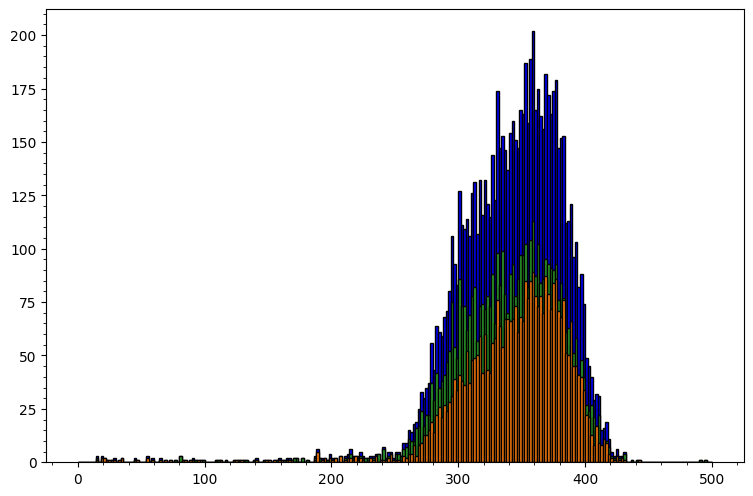

In [9]:
plot_var_wall(april_list[0][0],["blue","tab:green","tab:orange"],0,"QPeak","TStartQpeak",1.305e-6,[0,500])

Text(0, 0.5, 'Counts')

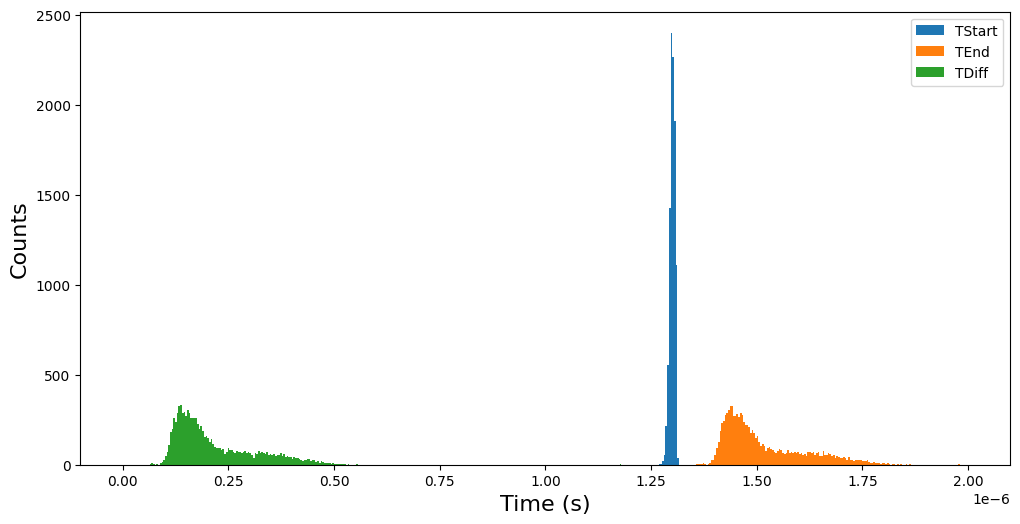

In [6]:
# plt.hist2(april_list[0][2]["QPeakRange4"],150,[[200,500],[0,1.5]]);
axes=[0,2e-6];
sampling=4e-9;
nbins=round((axes[1]-axes[0])/sampling)

fig=plt.figure(figsize=(12,6), dpi= 100, facecolor='w', edgecolor='k')
plt.hist(may_list[0][0]["TStartQpeak"],nbins,axes);
plt.hist(may_list[0][0]["TEndQPeak"],nbins,axes);
plt.hist(may_list[0][0]["TDiff"],nbins,axes);
plt.legend(["TStart","TEnd","TDiff"])

plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Counts", fontsize=16)  


Correlations

In [10]:
PMT=april_list[0][0][["Amp","TStartQpeak","TEndQPeak","TDiff","QFixRange4"]]
SiPM1=april_list[0][1][["Amp","TStartQpeak","TEndQPeak","TDiff","QFixRange4"]]
SiPM2=april_list[0][2][["Amp","TStartQpeak","TEndQPeak","TDiff","QFixRange4"]]


# PMT=may_list[0][0][["Amp","TStartQpeak","TEndQPeak","TDiff","QFixRange4"]]
# SiPM1=may_list[0][1][["Amp","TStartQpeak","TEndQPeak","TDiff","QFixRange4"]]
# SiPM2=may_list[0][2][["Amp","TStartQpeak","TEndQPeak","TDiff","QFixRange4"]]

PMT.columns=["Amp$_{PMT}$","TStartQpeak$_{PMT}$","TEndQPeak$_{PMT}$","TDiff$_{PMT}$","QTotal$_{PMT}$"]
SiPM1.columns=["Amp$_{SiPM1}$","TStartQpeak$_{SiPM1}$","TEndQPeak$_{SiPM1}$","TDiff$_{SiPM1}$","QTotal$_{SiPM1}$"]
SiPM2.columns=["Amp$_{SiPM2}$","TStartQpeak$_{SiPM2}$","TEndQPeak$_{SiPM2}$","TDiff$_{SiPM2}$","QTotal$_{SiPM2}$"]

PMT=PMT.reset_index(drop=True)
SiPM1=SiPM1.reset_index(drop=True)
SiPM2=SiPM2.reset_index(drop=True)

aux=pd.DataFrame.join(PMT,SiPM1)
total=pd.DataFrame.join(aux,SiPM2)
total["F100$_{PMT}$"]=(april_list[0][0][["QPeakRange1"]].values/PMT[["QTotal$_{PMT}$"]].values)
total["F100$_{SiPM1}$"]=(april_list[0][1][["QPeakRange1"]].values/SiPM1[["QTotal$_{SiPM1}$"]].values)
total["F100$_{SiPM2}$"]=(april_list[0][2][["QPeakRange1"]].values/SiPM2[["QTotal$_{SiPM2}$"]].values)
# total["F100$_{PMT}$"]=(may_list[0][0][["QPeakRange1"]].values/PMT[["QTotal$_{PMT}$"]].values)
# total["F100$_{SiPM1}$"]=(may_list[0][1][["QPeakRange1"]].values/SiPM1[["QTotal$_{SiPM1}$"]].values)
# total["F100$_{SiPM2}$"]=(may_list[0][2][["QPeakRange1"]].values/SiPM2[["QTotal$_{SiPM2}$"]].values)

total["Qtotal$_{BothSiPM}$"]=(SiPM1[["QTotal$_{SiPM1}$"]].values+SiPM2[["QTotal$_{SiPM2}$"]].values)

total_light=total[["QTotal$_{PMT}$","Amp$_{PMT}$","TEndQPeak$_{PMT}$","TEndQPeak$_{SiPM1}$","TEndQPeak$_{SiPM2}$","Qtotal$_{BothSiPM}$"]]

total_light

,QTotal$_{PMT}$,Amp$_{PMT}$,TEndQPeak$_{PMT}$,TEndQPeak$_{SiPM1}$,TEndQPeak$_{SiPM2}$,Qtotal$_{BothSiPM}$
0,359.516602,5770.419922,0.000001,0.000002,0.000002,392.251953
1,296.915039,5117.523926,0.000001,0.000002,0.000002,380.545898
2,408.723633,5970.251953,0.000001,0.000002,0.000002,471.012695
3,275.051758,4796.771973,0.000001,0.000002,0.000002,412.552734
4,289.798828,4520.576172,0.000001,0.000002,0.000002,380.634766
...,...,...,...,...,...,...
8575,309.588867,4865.755859,0.000001,0.000002,0.000002,428.072266
8576,377.015625,5502.056152,0.000001,0.000002,0.000002,394.009766
8577,349.641602,5658.211914,0.000001,0.000002,0.000002,346.161133
8578,268.257812,4579.744141,0.000001,0.000002,0.000002,421.433594


In [11]:
total.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-11-d966d22c3bd1>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  total.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(2)


,Amp$_{PMT}$,TStartQpeak$_{PMT}$,TEndQPeak$_{PMT}$,TDiff$_{PMT}$,QTotal$_{PMT}$,Amp$_{SiPM1}$,TStartQpeak$_{SiPM1}$,TEndQPeak$_{SiPM1}$,TDiff$_{SiPM1}$,QTotal$_{SiPM1}$,Amp$_{SiPM2}$,TStartQpeak$_{SiPM2}$,TEndQPeak$_{SiPM2}$,TDiff$_{SiPM2}$,QTotal$_{SiPM2}$,F100$_{PMT}$,F100$_{SiPM1}$,F100$_{SiPM2}$,Qtotal$_{BothSiPM}$
Amp$_{PMT}$,1.00,0.04,0.25,0.25,0.61,0.13,0.03,0.10,0.10,0.12,0.16,0.02,0.09,0.09,0.15,-0.35,-0.03,-0.03,0.16
TStartQpeak$_{PMT}$,0.04,1.00,0.01,-0.06,-0.01,0.05,0.54,0.00,-0.01,0.01,0.04,0.53,-0.01,-0.03,-0.00,-0.02,-0.16,-0.17,0.00
TEndQPeak$_{PMT}$,0.25,0.01,1.00,1.00,0.78,0.24,0.04,0.45,0.45,0.47,0.17,0.03,0.39,0.38,0.44,-0.64,-0.29,-0.29,0.57
TDiff$_{PMT}$,0.25,-0.06,1.00,1.00,0.78,0.24,0.00,0.45,0.45,0.47,0.17,-0.00,0.39,0.39,0.44,-0.64,-0.28,-0.28,0.57
QTotal$_{PMT}$,0.61,-0.01,0.78,0.78,1.00,0.25,0.02,0.41,0.41,0.43,0.21,0.01,0.35,0.35,0.43,-0.70,-0.24,-0.24,0.54
Amp$_{SiPM1}$,0.13,0.05,0.24,0.24,0.25,1.00,0.05,0.42,0.42,0.85,0.11,0.07,0.14,0.14,0.16,-0.23,0.08,-0.13,0.70
TStartQpeak$_{SiPM1}$,0.03,0.54,0.04,0.00,0.02,0.05,1.00,0.02,-0.01,0.02,0.07,0.57,0.03,0.01,0.04,-0.06,-0.16,-0.16,0.04
TEndQPeak$_{SiPM1}$,0.10,0.00,0.45,0.45,0.41,0.42,0.02,1.00,1.00,0.62,0.11,0.04,0.29,0.29,0.29,-0.42,-0.47,-0.24,0.60
TDiff$_{SiPM1}$,0.10,-0.01,0.45,0.45,0.41,0.42,-0.01,1.00,1.00,0.62,0.11,0.02,0.29,0.29,0.29,-0.42,-0.46,-0.23,0.60
QTotal$_{SiPM1}$,0.12,0.01,0.47,0.47,0.43,0.85,0.02,0.62,0.62,1.00,0.11,0.03,0.25,0.25,0.26,-0.42,-0.28,-0.23,0.87


In [15]:
total.cov().style.background_gradient(cmap='coolwarm').set_precision(0)

<ipython-input-15-95189c70fd7d>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  total.cov().style.background_gradient(cmap='coolwarm').set_precision(0)


,Amp$_{PMT}$,TStartQpeak$_{PMT}$,TEndQPeak$_{PMT}$,TDiff$_{PMT}$,QTotal$_{PMT}$,Amp$_{SiPM1}$,TStartQpeak$_{SiPM1}$,TEndQPeak$_{SiPM1}$,TDiff$_{SiPM1}$,QTotal$_{SiPM1}$,Amp$_{SiPM2}$,TStartQpeak$_{SiPM2}$,TEndQPeak$_{SiPM2}$,TDiff$_{SiPM2}$,QTotal$_{SiPM2}$,F100$_{PMT}$,F100$_{SiPM1}$,F100$_{SiPM2}$,Qtotal$_{BothSiPM}$
Amp$_{PMT}$,61540,0,0,0,127624,12620,0,0,0,14387,10171,0,0,0,10556,-5,-3,-3,24943
TStartQpeak$_{PMT}$,0,0,-0,-0,-0,0,0,0,-0,0,0,0,-0,-0,0,-0,-0,-0,0
TEndQPeak$_{PMT}$,0,-0,0,0,0,0,-0,0,0,0,0,-0,0,0,0,-0,-0,-0,0
TDiff$_{PMT}$,0,-0,0,0,0,0,-0,0,0,0,0,-0,0,0,0,-0,-0,-0,0
QTotal$_{PMT}$,127624,-0,0,0,1439229,58626,-0,0,0,127286,41260,-0,0,0,104510,-43,-33,-33,231796
Amp$_{SiPM1}$,12620,0,0,0,58626,26160,0,0,0,20736,2467,0,0,0,3323,-2,0,-1,24058
TStartQpeak$_{SiPM1}$,0,0,-0,-0,-0,0,0,-0,-0,-0,0,0,0,-0,0,-0,-0,-0,-0
TEndQPeak$_{SiPM1}$,0,0,0,0,0,0,-0,0,0,0,0,0,0,0,0,-0,-0,-0,0
TDiff$_{SiPM1}$,0,-0,0,0,0,0,-0,0,0,0,0,-0,0,0,0,-0,-0,-0,0
QTotal$_{SiPM1}$,14387,0,0,0,127286,20736,-0,0,0,26924,2862,0,0,0,8031,-4,-3,-3,34956


In [16]:
total_light

,QTotal$_{PMT}$,Amp$_{PMT}$,TEndQPeak$_{PMT}$,TEndQPeak$_{SiPM1}$,TEndQPeak$_{SiPM2}$,Qtotal$_{BothSiPM}$
0,2272.183594,11521.263672,0.000002,0.000002,0.000002,558.187500
1,2438.298828,11778.272461,0.000002,0.000002,0.000002,575.874023
2,2340.372070,11828.923828,0.000001,0.000002,0.000002,548.270508
3,2224.694336,11888.307617,0.000001,0.000002,0.000002,644.484375
4,2028.201172,11867.711914,0.000002,0.000002,0.000002,467.004883
...,...,...,...,...,...,...
9995,2520.517578,11648.519531,0.000001,0.000002,0.000002,699.881836
9996,2432.487305,11999.507812,0.000001,0.000002,0.000002,508.158203
9997,2399.969727,11710.835938,0.000001,0.000002,0.000002,596.763672
9998,2446.958008,11926.019531,0.000002,0.000002,0.000002,502.195312


3D PLots

In [24]:
total2=total[(total["QTotal$_{PMT}$"]<4000) & (total["Amp$_{PMT}$"]>9000)  & (total["Amp$_{PMT}$"]<14000) ]# & (total["TEndQPeak$_{PMT}$"]<1.6e-6)
total2=total2.reset_index(drop=True)

plt.ion()
myvars=["QTotal$_{PMT}$",
        "TEndQPeak$_{PMT}$",
        "Amp$_{PMT}$",
        "F100$_{PMT}$",
        "TEndQPeak$_{SiPM1}$",
        "TEndQPeak$_{SiPM2}$",
        "Qtotal$_{BothSiPM}$"]

counter=0;
combinations = list(itertools.combinations(myvars, 3))
combinations = list(combinations)
for myvars2 in combinations:            
    counter+=1;
    if (counter>1) & (counter>1):
        continue
    x = total2[myvars2[0]]
    y = total2[myvars2[1]]
    z = total2[myvars2[2]]

    xyz = np.vstack([x,y,z])
    density = stats.gaussian_kde(xyz)(xyz) 

    idx = density.argsort()
    x, y, z, density = x[idx], y[idx], z[idx], density[idx]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=density,marker=".")
    ax.set_xlabel(myvars2[0], fontsize=14)
    ax.set_ylabel(myvars2[1], fontsize=14)
    ax.set_zlabel(myvars2[2], fontsize=14)

    plt.show()
plt.ioff()

Cosmics: 650ADC coincidencias SiPM 1 y 2

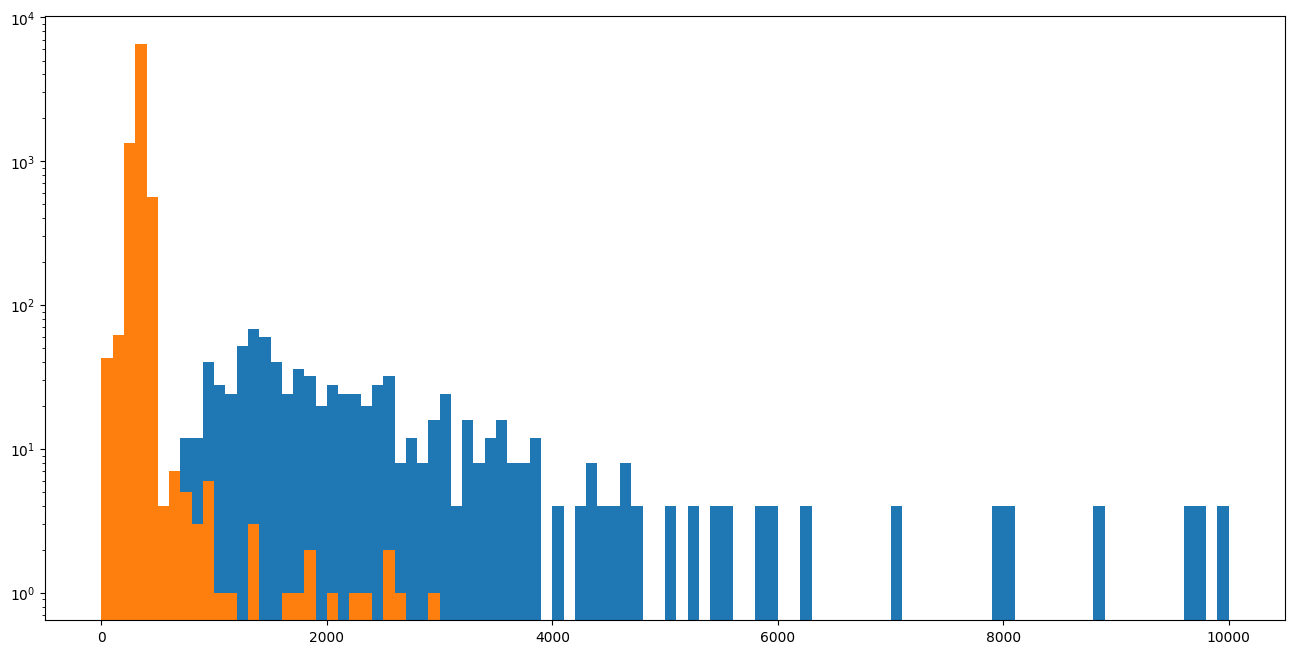

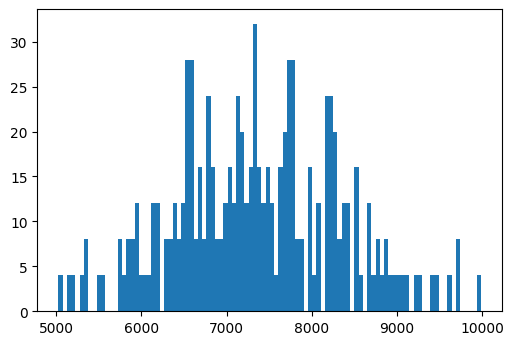

In [4]:
axes=[1e-6,5e-6]
nbins=100
# nbins=round((axes[1]-axes[0])/sampling)
# plt.hist(april_cosmics_list[0][1]["TEndQPeak"],nbins,axes);
# plt.hist(april_cosmics_list[0][2]["TEndQPeak"],nbins,axes);

all_cosmics_0=pd.concat([april_cosmics_list[0][0],april_cosmics_list[1][0],april_cosmics_list[2][0],april_cosmics_list[3][0]])
all_cosmics_1=pd.concat([april_cosmics_list[0][1],april_cosmics_list[1][1],april_cosmics_list[2][1],april_cosmics_list[3][1]])
all_cosmics_2=pd.concat([april_cosmics_list[0][2],april_cosmics_list[1][2],april_cosmics_list[2][2],april_cosmics_list[3][2]])

# fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
# plt.hist(all_cosmics_0["TEndQPeak"],nbins,axes);

fig=plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')
plt.hist(all_cosmics_0["QPeakRange4"],nbins,[0,10e3]);
plt.hist(april_list[0][0]["QPeakRange4"],nbins,[0,10e3]);
plt.yscale('log')

# plt.hist(all_cosmics_0["QPeakRange1"],nbins,[0,4e3]);

fig=plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
plt.hist(all_cosmics_0["Amp"],nbins);


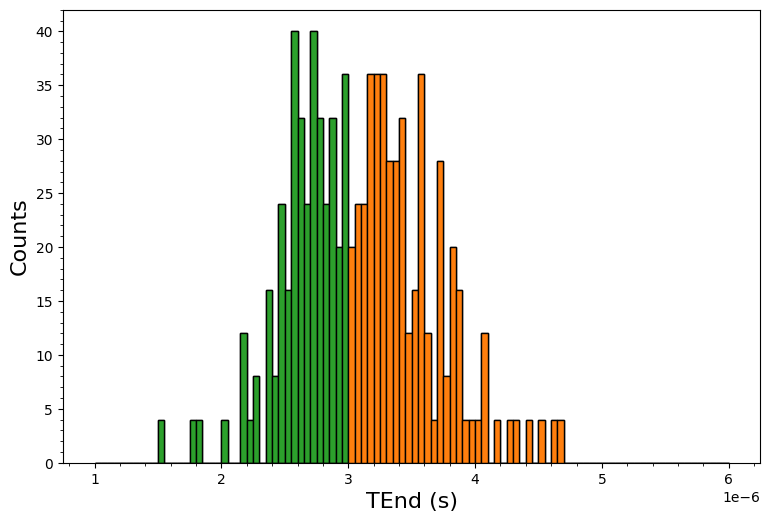

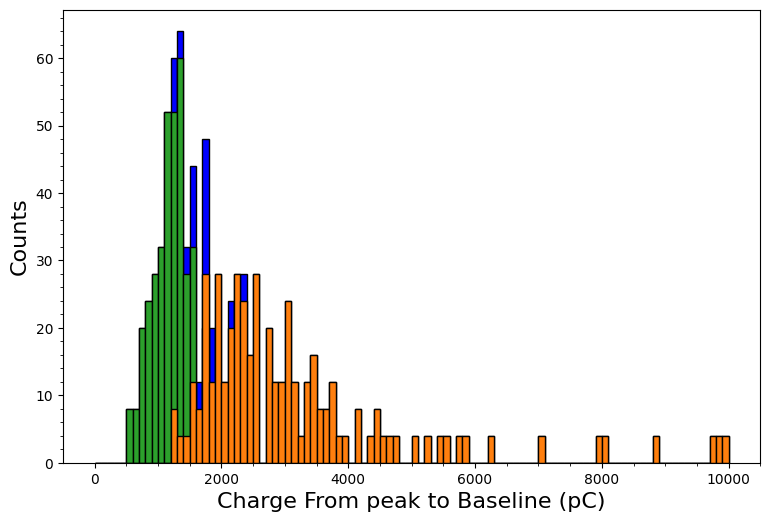

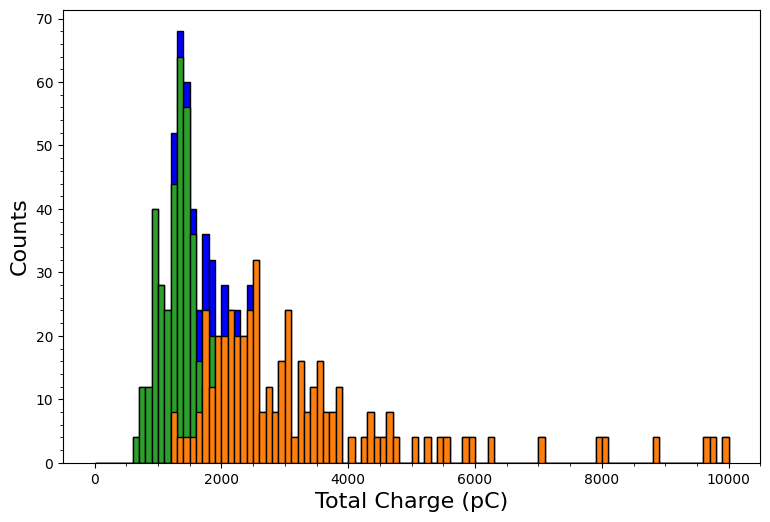

In [21]:
#Abril cosmics
plot_var_wall(all_cosmics_0,["blue","tab:green","tab:orange"],0,"TEndQPeak","TEndQPeak",3e-6,[1e-6,6e-6],100,"TEnd (s)")
plot_var_wall(all_cosmics_0,["blue","tab:green","tab:orange"],0,"QPeak","TEndQPeak",3e-6,[0,1e4],100,"Charge From peak to Baseline (pC)")
plot_var_wall(all_cosmics_0,["blue","tab:green","tab:orange"],0,"QFixRange4","TEndQPeak",3e-6,[0,1e4],100,"Total Charge (pC)")



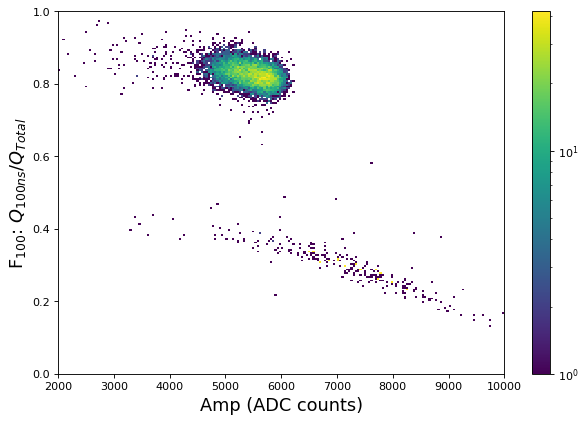

In [35]:
april_cosmics_list[0][0].reset_index(drop=True)
time=(april_cosmics_list[0][0].iloc[-1]["time"]-april_cosmics_list[0][0].iloc[0]["time"])
# time/(2**10)
time*0.000000008/60
# all_cosmics_0.reset_index(drop=True)

df1=all_cosmics_0
f100=df1["QPeakRange1"]/df1["QPeakRange4"];

fig=plt.figure(figsize=(9,6), dpi= 80, facecolor='w', edgecolor='k')
# h=plt.hist2d(df1["QPeakRange4"],f100,200,[[8e3,15e3],[0,1]],norm=LogNorm());
# plt.xlabel("Carga Total (pC)", fontsize=16)
# plt.ylabel("F$_{100}$: $Q_{100ns}/Q_{Total}$", fontsize=16)  

h=plt.hist2d(df1["Amp"],f100,200,[[2e3,10e3],[0,1]],norm=LogNorm());
plt.xlabel("Amp (ADC counts)", fontsize=16)
plt.ylabel("F$_{100}$: $Q_{100ns}/Q_{Total}$", fontsize=16)  



df1=april_list[0][0]
f100=df1["QPeakRange1"]/df1["QPeakRange4"];
h=plt.hist2d(df1["Amp"],f100,200,[[2e3,10e3],[0,1]],norm=LogNorm());

plt.colorbar(h[3])


plt.show()




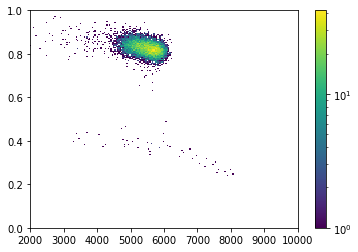

49
8531
0.005743758058844215


In [8]:
df1=april_list[0][0]
f100=df1["QPeakRange1"]/df1["QPeakRange4"];
h=plt.hist2d(df1["Amp"],f100,200,[[2e3,10e3],[0,1]],norm=LogNorm());

plt.colorbar(h[3])


plt.show()
print(len(f100[f100<0.6]))
print(len(f100[f100>0.6]))
print(len(f100[f100<0.6])/len(f100[f100>0.6]))


Low Trigger/Energy

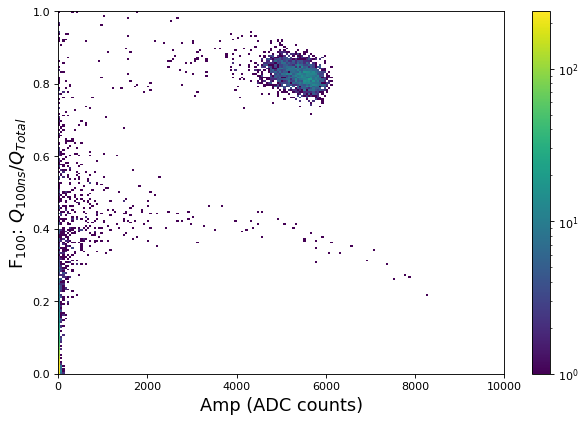

2612
6163
0.29766381766381766


In [40]:
df1=april_low_trigger[0][0]
f100=df1["QPeakRange1"]/df1["QPeakRange4"];
df1["f100"]=f100

fig=plt.figure(figsize=(9,6), dpi= 80, facecolor='w', edgecolor='k')
h=plt.hist2d(df1["Amp"],df1["f100"],200,[[0.0e3,10e3],[0,1]],norm=LogNorm());
plt.colorbar(h[3])
plt.xlabel("Amp (ADC counts)", fontsize=16)
plt.ylabel("F$_{100}$: $Q_{100ns}/Q_{Total}$", fontsize=16)  


plt.show()
alfas=((df1[((df1["f100"]>0.7) & (df1["Amp"]>1000))]))
rest=(df1[~((df1["f100"]>0.7) & (df1["Amp"]>1000))])
print(len(alfas))
print(len(rest))
print(len(alfas)/len(rest+alfas))


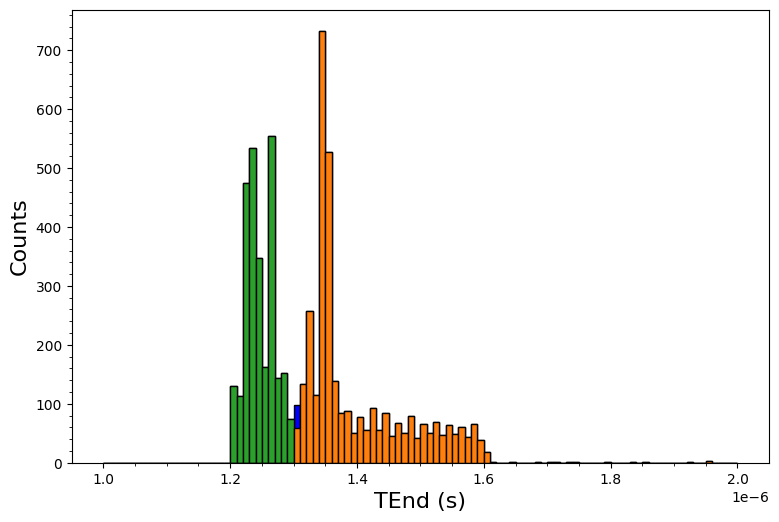

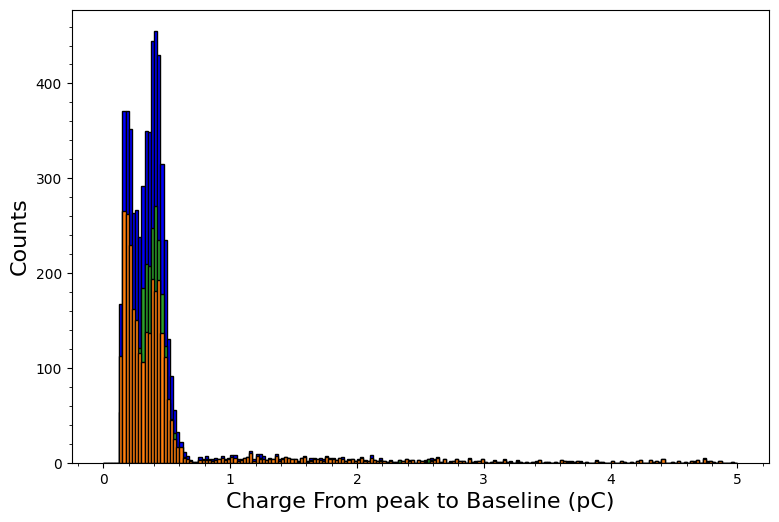

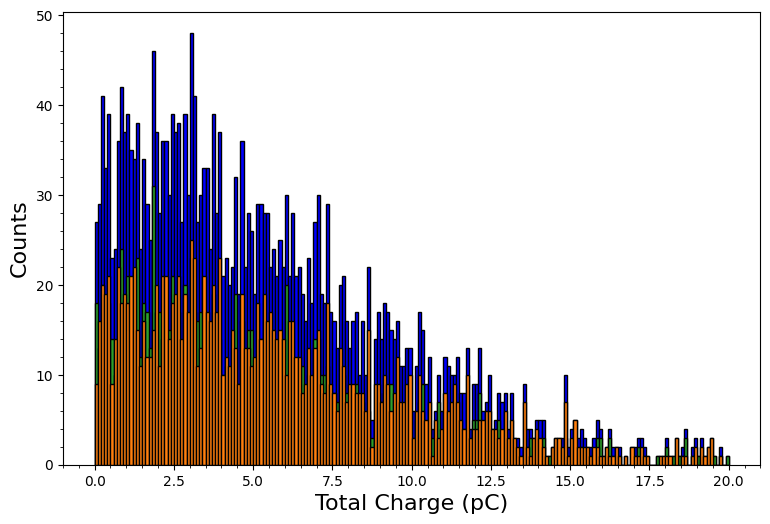

In [69]:
#Abril low energy
df1=april_low_trigger[0][0]
f100=df1["QPeakRange1"]/df1["QPeakRange4"];
df1["f100"]=f100
alfas=((df1[((df1["f100"]>0.7) & (df1["Amp"]>1000))]))
rest=(df1[~((df1["f100"]>0.7) & (df1["Amp"]>1000))])

wall=1.3e-6
nbins=200
plot_var_wall(rest,["blue","tab:green","tab:orange"],0,"TEndQPeak","TEndQPeak",wall,[1e-6,2e-6],100,"TEnd (s)")
plot_var_wall(rest,["blue","tab:green","tab:orange"],0,"QPeak","TEndQPeak",wall,[0,5],nbins,"Charge From peak to Baseline (pC)")
plot_var_wall(rest,["blue","tab:green","tab:orange"],0,"QFixRange4","TEndQPeak",wall,[0,20],nbins,"Total Charge (pC)")
# plt.yscale('log')



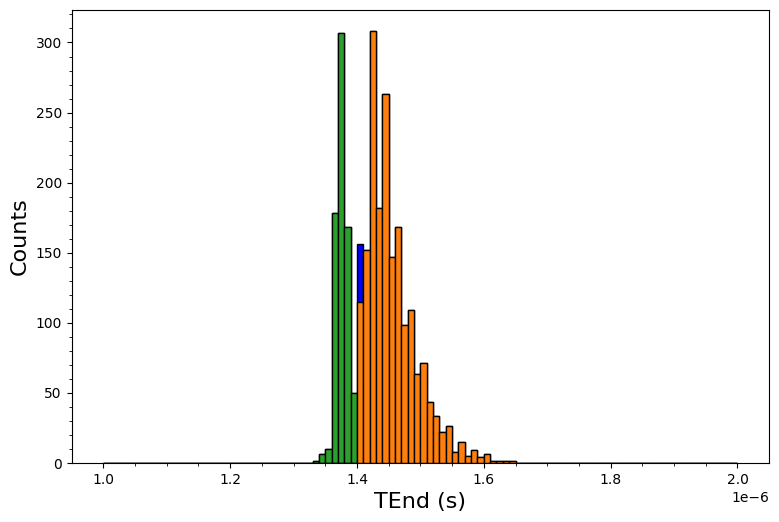

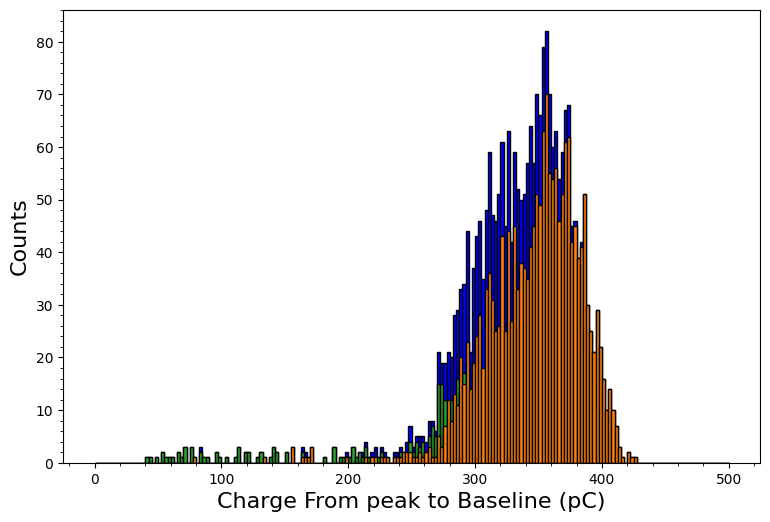

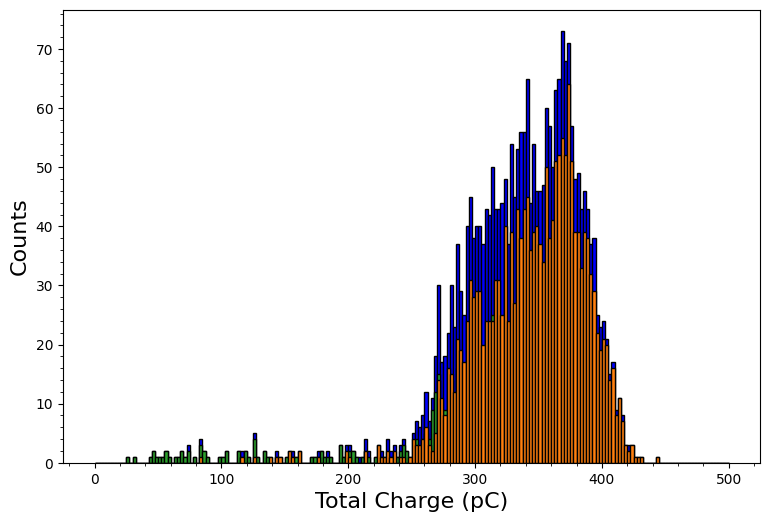

In [72]:
#Abril low energy
df1=april_low_trigger[0][0]
f100=df1["QPeakRange1"]/df1["QPeakRange4"];
df1["f100"]=f100
alfas=((df1[((df1["f100"]>0.7) & (df1["Amp"]>1000))]))
rest=(df1[~((df1["f100"]>0.7) & (df1["Amp"]>1000))])

wall=1.4e-6
nbins=200
plot_var_wall(alfas,["blue","tab:green","tab:orange"],0,"TEndQPeak","TEndQPeak",wall,[1e-6,2e-6],100,"TEnd (s)")
plot_var_wall(alfas,["blue","tab:green","tab:orange"],0,"QPeak","TEndQPeak",wall,[0,500],nbins,"Charge From peak to Baseline (pC)")
plot_var_wall(alfas,["blue","tab:green","tab:orange"],0,"QFixRange4","TEndQPeak",wall,[0,500],nbins,"Total Charge (pC)")
# plt.yscale('log')
